In [1]:
from auto_drive_functions import retrieve_angle 
from PIL import Image,ImageOps,ImageFilter
from ImageFrame import Frame
import timeit as ti
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from EdgeFinderV1 import EdgeFinder as ef 

In [2]:
img = Image.open('image/img10.jpg')
img = ImageOps.grayscale(img)
#img = img.filter(ImageFilter.GaussianBlur(1))

In [3]:
img = np.array(img)
img.shape

(480, 640)

In [3]:
frame1 = Frame(640,480,10)

load CVS file successfully


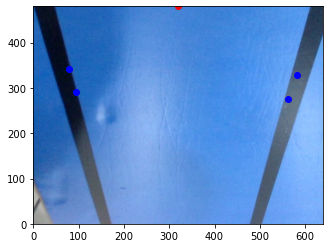

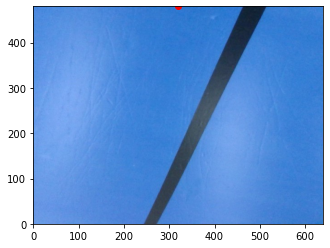

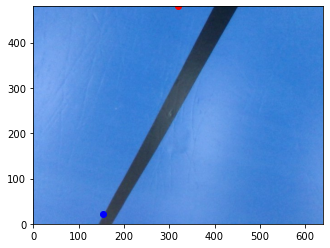

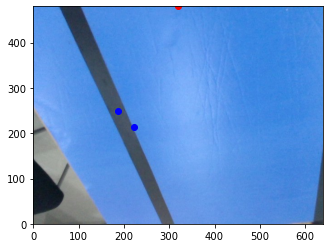

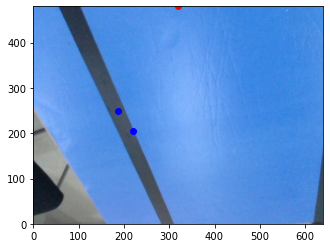

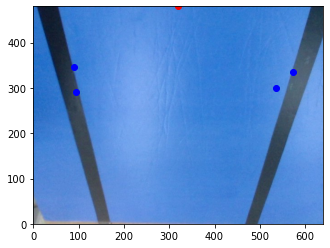

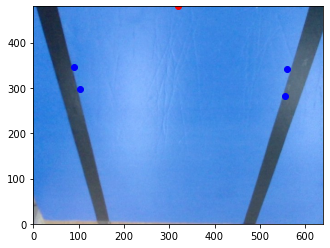

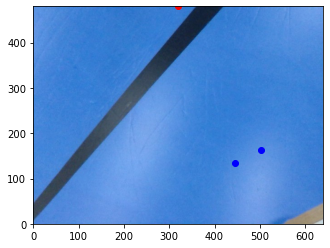

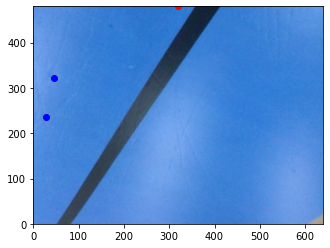

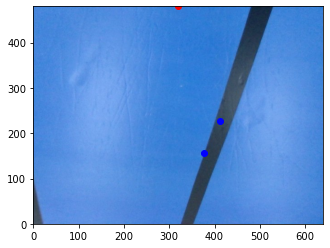

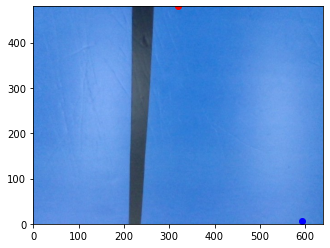

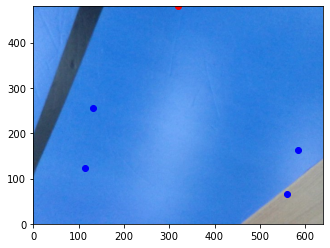

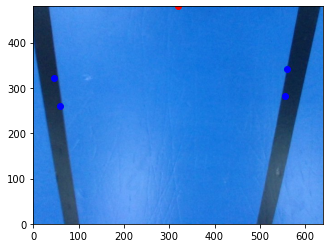

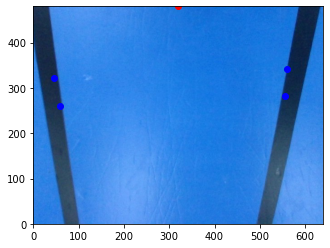

In [8]:
for num in range(20,34):
    img = Image.open('image/img'+str(num)+'.jpg')
    #img = ImageOps.grayscale(img)
    #img = img.filter(ImageFilter.GaussianBlur(1))
    #starttime = ti.default_timer()
    angle = retrieve_angle(100,5,2,img,frame1,sense=2)
    #print(ti.default_timer()-starttime)
    #print(angle[2])
    points = angle[0]
    plt.axis([0.0,640,0.0,480])
    gray()
    imshow(img)
    plt.title('img'+str(num))
    plt.plot(640/2,480,'ro')
    plt.plot(points[:,0],points[:,1],'bo')
    plt.show()